<center><img src="https://raw.githubusercontent.com/unpetee/getocidisks/master/telefonica.png"></center>

<center><h1>M2M Jupyter Notebook Forecasting</center></h1>

<center><img src="https://raw.githubusercontent.com/unpetee/getocidisks/master/gfi.png"></center>

## M2M Throughput per instance

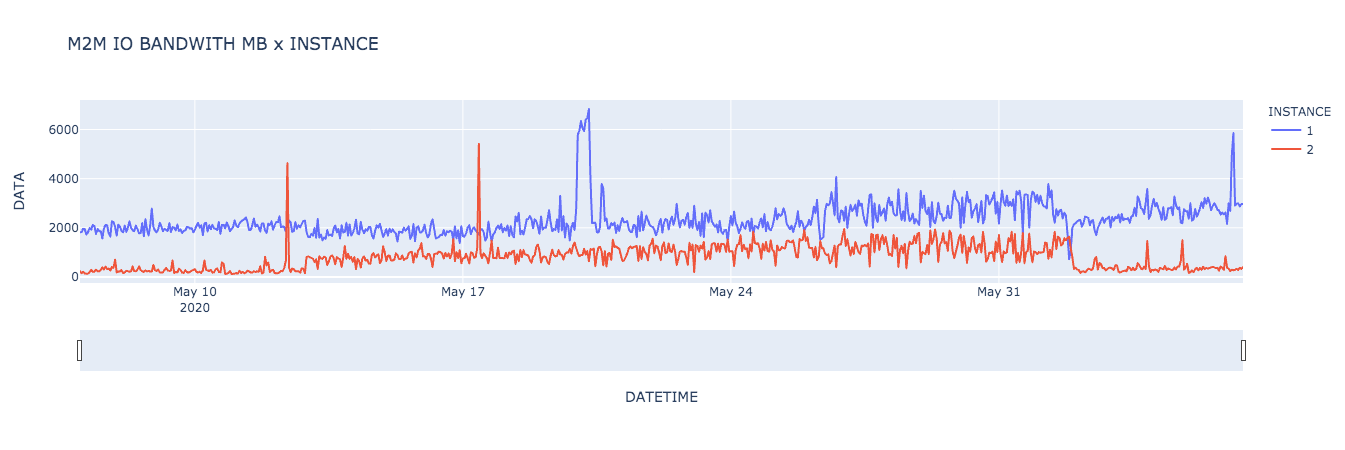

In [12]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as po
df = pd.read_csv('https://raw.githubusercontent.com/unpetee/getocidisks/master/m2miops.csv')
df['DATETIME']= pd.to_datetime(df['DATETIME'],format="%d/%m/%Y %H:%M")
fig = px.line(df, x = 'DATETIME', y = 'DATA',color='INSTANCE', title='M2M IO BANDWITH MB x INSTANCE')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## M2M Throughput TOTAL

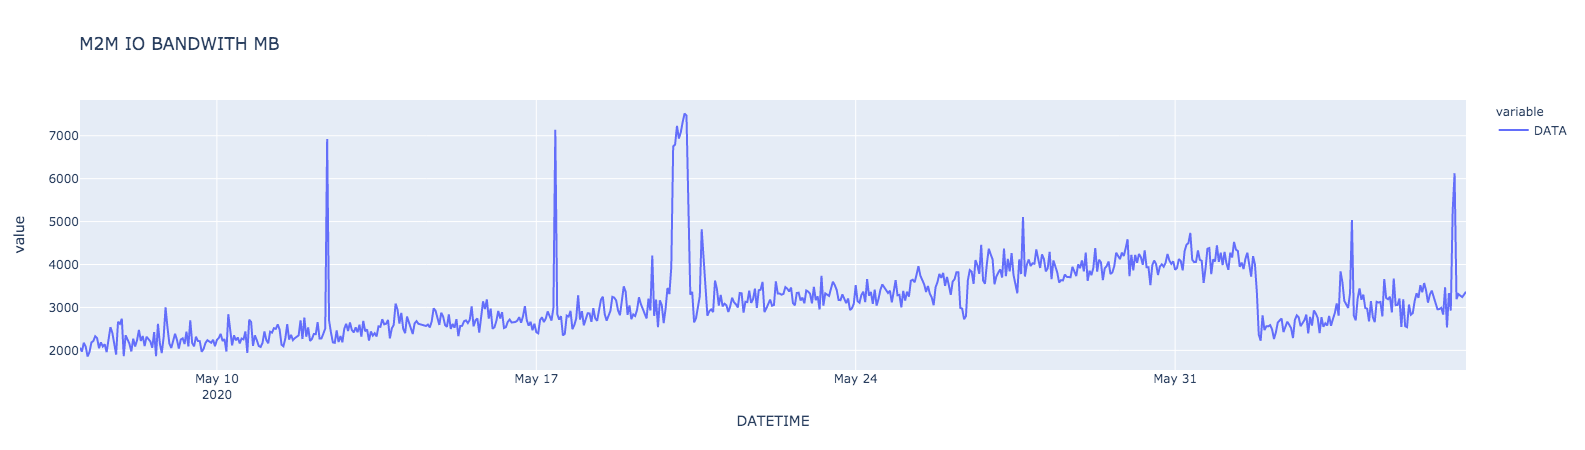

In [28]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as po
import datetime as dt

df = pd.read_csv('https://raw.githubusercontent.com/unpetee/getocidisks/master/m2miops.csv')
df['DATETIME']= pd.to_datetime(df['DATETIME'],format="%d/%m/%Y %H:%M").dt.strftime('%d/%m/%Y %H')
df['DATETIME']= pd.to_datetime(df['DATETIME'],format="%d/%m/%Y %H")
gb_date = df.groupby("DATETIME")["DATA"].sum()
#gb_date.head(100)
#gb_date.dtypes
fig = px.line(gb_date,title='M2M IO BANDWITH MB')
fig.show()


## Transactions per second, per instance

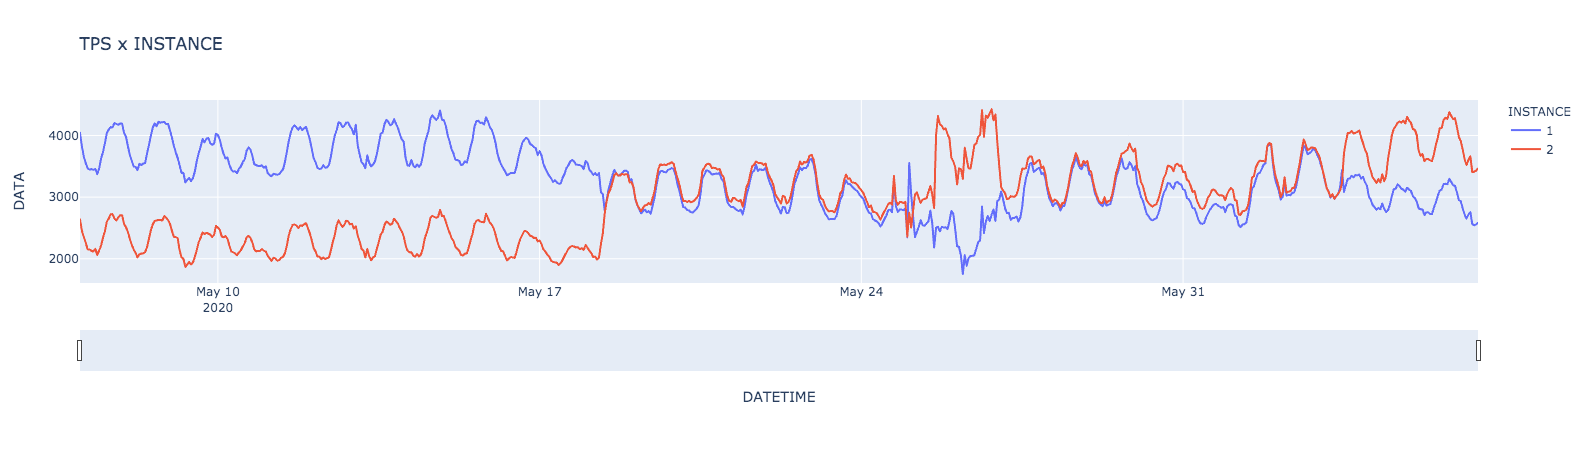

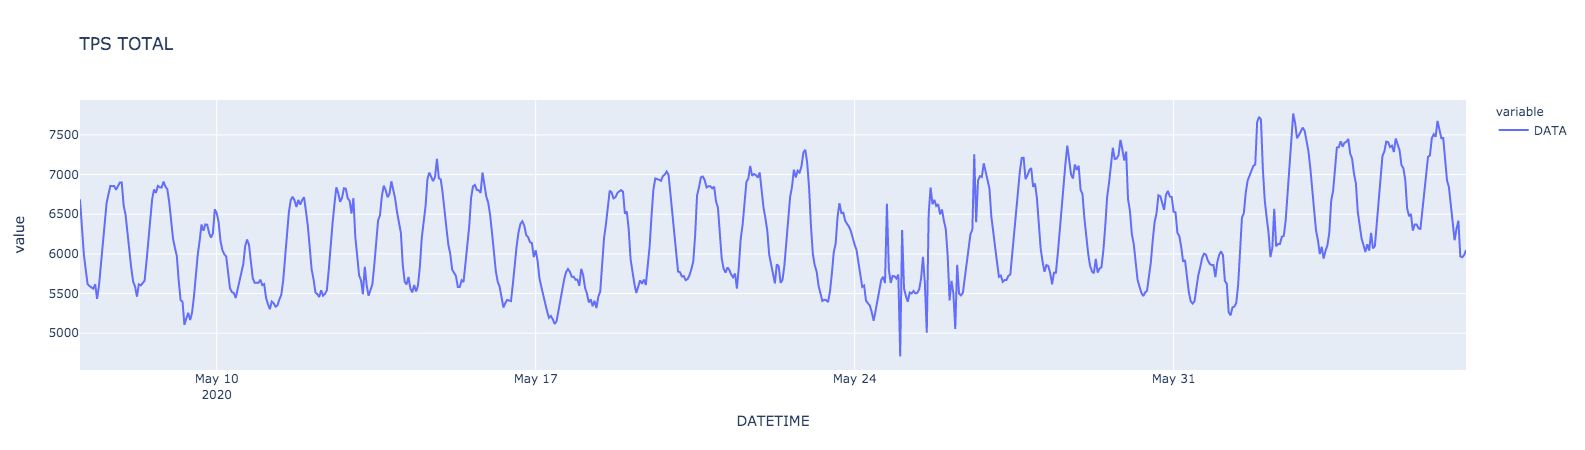

In [47]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as po
df = pd.read_csv('https://raw.githubusercontent.com/unpetee/getocidisks/master/m2mtransps.csv')
df['DATETIME']= pd.to_datetime(df['DATETIME'],format="%d/%m/%Y %H:%M")
fig = px.line(df, x = 'DATETIME', y = 'DATA',color='INSTANCE', title='TPS x INSTANCE')
fig.update_xaxes(rangeslider_visible=True)
fig.show()
df['DATETIME']= pd.to_datetime(df['DATETIME'],format="%d/%m/%Y %H:%M").dt.strftime('%d/%m/%Y %H')
df['DATETIME']= pd.to_datetime(df['DATETIME'],format="%d/%m/%Y %H")
gb_date = df.groupby("DATETIME")["DATA"].sum()
fig2 = px.line(gb_date,title='TPS TOTAL')
fig2.show()

## M2M Transaction per second. HH24 scaterred.

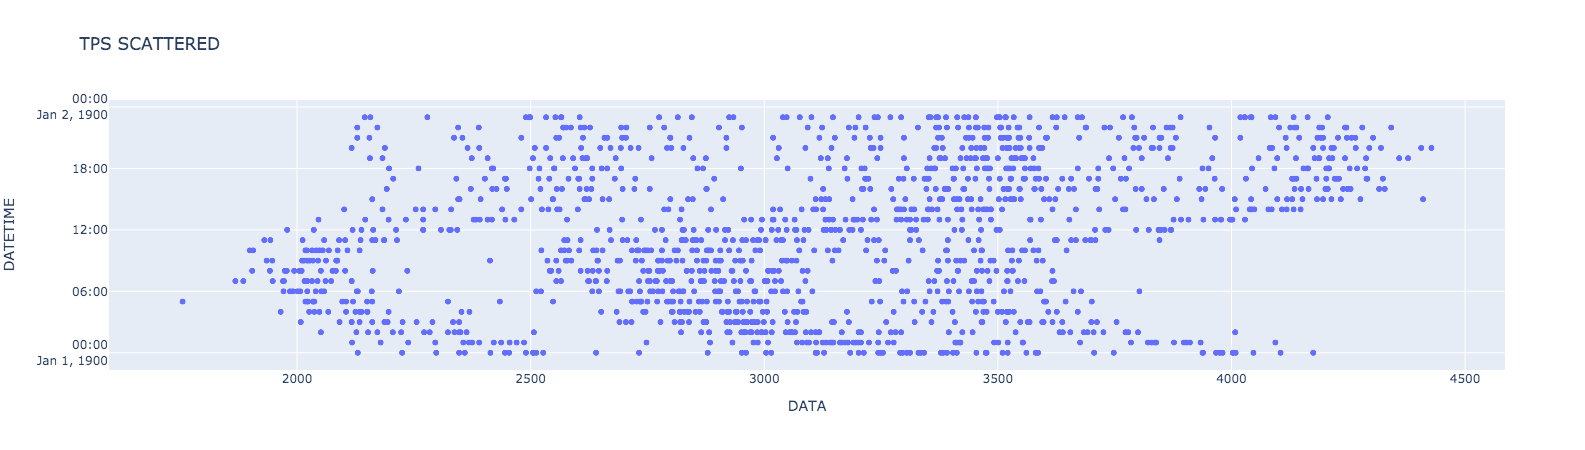

In [43]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('https://raw.githubusercontent.com/unpetee/getocidisks/master/m2mtransps.csv')
df['DATETIME']= pd.to_datetime(df['DATETIME'],format="%d/%m/%Y %H:%M").dt.strftime('%H')
df['DATETIME']= pd.to_datetime(df['DATETIME'],format="%H")
gb_date = df.groupby("DATETIME")["DATA"].sum()
#gb_date.head(100)
fig = px.scatter(df, x = 'DATA', y = 'DATETIME', title='TPS SCATTERED')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

## Average Active Session Per Instance (40 CPUs)

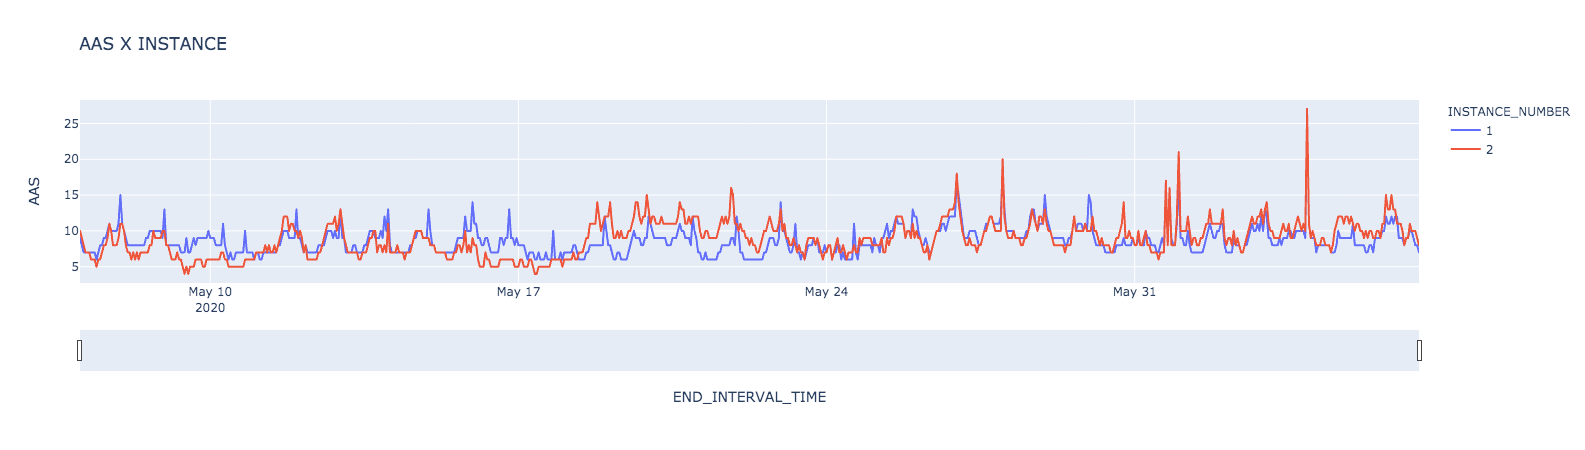

In [11]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('https://raw.githubusercontent.com/unpetee/getocidisks/master/m2mass_dbtime.csv')
df['END_INTERVAL_TIME']= pd.to_datetime(df['END_INTERVAL_TIME'],format="%d/%m/%Y %H:%M")
fig = px.line(df, x = 'END_INTERVAL_TIME', y = 'AAS',color='INSTANCE_NUMBER', title='AAS X INSTANCE')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## M2M TABLESPACES (MB)

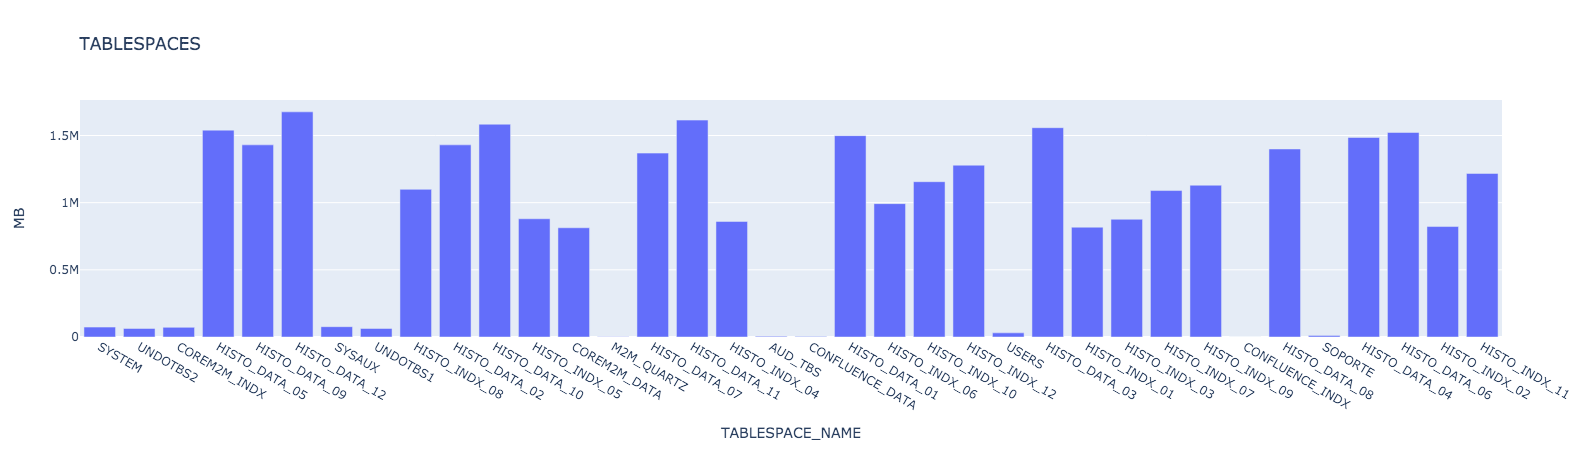

In [36]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('https://raw.githubusercontent.com/unpetee/getocidisks/master/m2mtblspace.csv')
fig = px.bar(df, x = 'TABLESPACE_NAME', y = 'MB', title='TABLESPACES MB')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

## M2M TOTAL MEMORY PER INSTANCE (SGA+PGA) MB

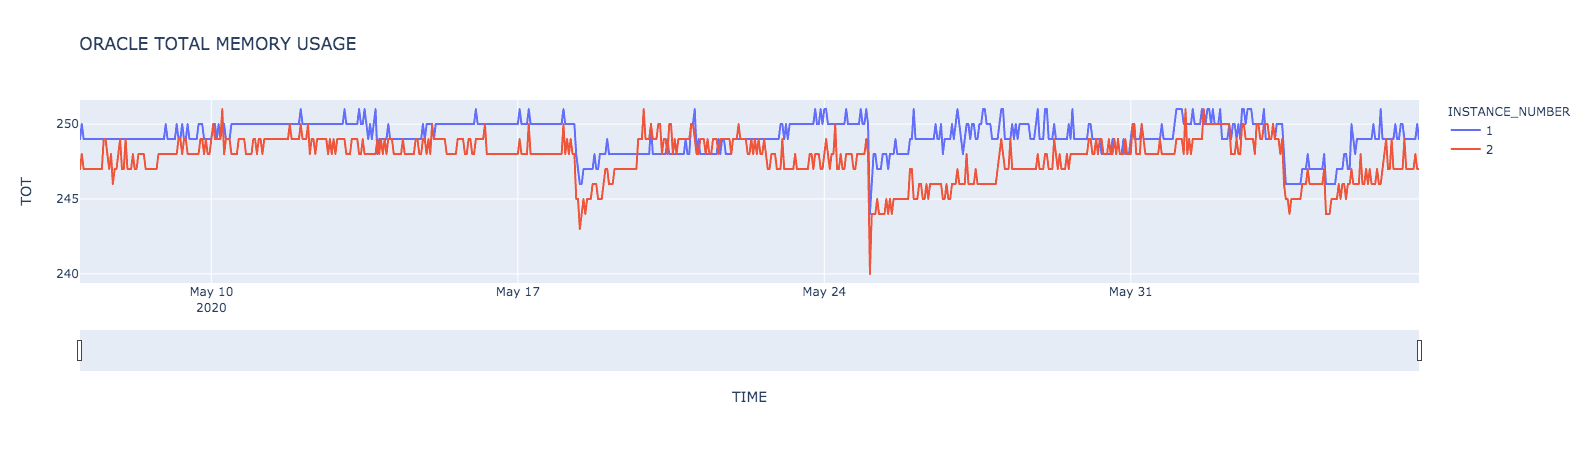

In [44]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('https://raw.githubusercontent.com/unpetee/getocidisks/master/m2mmemory_usage.csv')
df['TIME']= pd.to_datetime(df['TIME'],format="%d/%m/%Y %H:%M")
fig = px.line(df, x = 'TIME', y = 'TOT',color='INSTANCE_NUMBER', title='ORACLE TOTAL MEMORY USAGE')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## FG WAITS INSTANCE

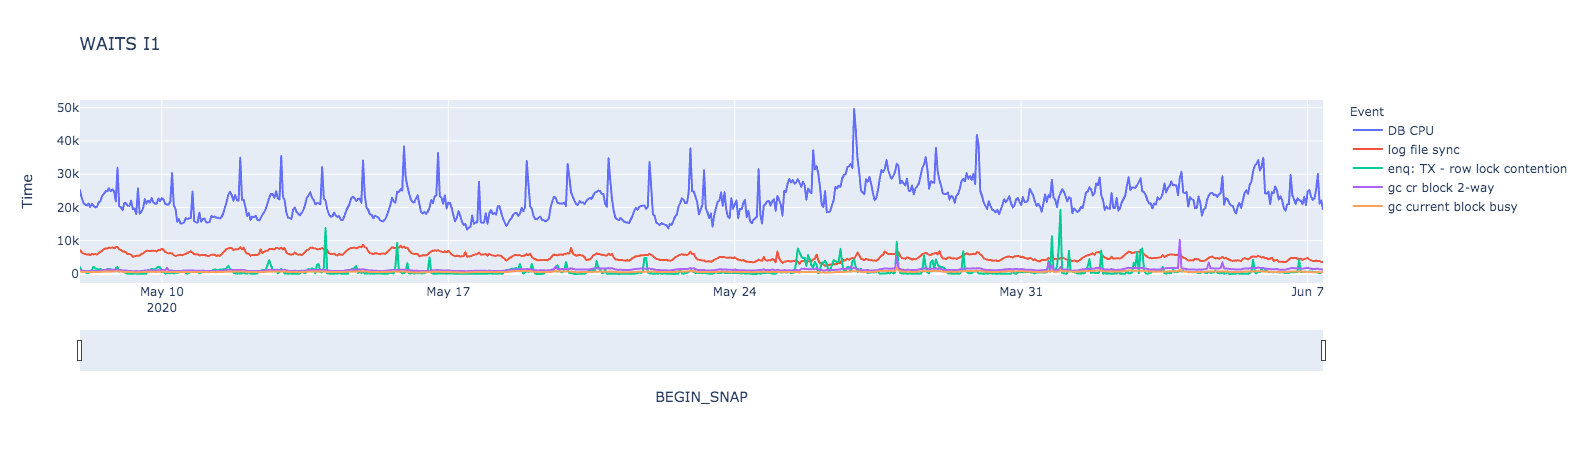

In [10]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('https://raw.githubusercontent.com/unpetee/getocidisks/master/m2mwaits.csv')
df['BEGIN_SNAP']= pd.to_datetime(df['BEGIN_SNAP'],format="%d/%m/%Y %H:%M")
fig = px.line(df, x = 'BEGIN_SNAP', y = 'Time',color='Event', title='WAITS I1')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

<h1><u>Historico de  Análisis</u></h1>
<h3>Mayo 2020 (Analisis inicial)</h3>
<ol style = "font-family:courier,arial,helvética;">
    <li>IO Disco. No se observa un problema de disco. La tendencia es de crecimiento mensual. Los picos y los valles, cada mes un punto más alto.
    Cada primero de mes baja el iops y el throutput, pero los minimos y los máximos son cada mes mas altos que el mes anterior. Si se mantiene esta tendencia, no será un problema a largo plazo.</li>
    <li>El número de transacciones por segundo tiene una tendencia al alza, sin que se prevea un problema a largo plazo. Lo que muestra la gráfica de TPS es como varía el comportamiento cada reinicio de aplicativo. Esto es así porque las conexiones a las instancias se realizan por round robin, por lo que cada reincio puede varíar la carga de las instancias sin mantenerse constante en el tiempo. Donde antes la carga estaba en la I1, ahora está en la I2.
    </li>
    <li>Average Active Session. Vemos una tendencia al alza, 1,5 puntos más al mes. Estamos en 15, el maximo es 40 (Limitado por CPU). Si este ritmo se mantiene tendremos problemas graves de rendiminto en <b>2 años</b>. (Siempre que el incremento sea lineal y no exponencial, lo que está por ver, segun tengamos más datos.) Este incremento está facalizado en DBCPU por lo que la prioridad es centrar el analisis de AWRs en esta espera.</li>